# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Problem Definition:
To identify and quantify the key drivers that influence used car prices by analyzing historical sales data. This will involve data collection, preprocessing, exploratory data analysis, and the application of various data mining techniques to uncover patterns and insights e.g. Feature selection, Model development, Model evaluation, Interpretation and Insights.
There are several possible approaches for data mining. I am going to follow the below approach for Feature selection, Model development, Model evaluation:
1. Create a Linear Regression model to predict Price based on numerical features
2. Create a Linear Regression model to predict Price based on numerical features + few categorical features
3. Create Ridge Regression model
4. Create LASSO model
Based on the evaluation of model performance, provide Interpretation and Insights 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
# import all the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Read data and create a dataframe
df = pd.read_csv("data/vehicles.csv")

In [2]:
# Check all the available columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [3]:
# View first few records
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
# check unique values in all the columns
df.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [5]:
# Missing data
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [6]:
# Dropping id and VIN columns because they are not expected to influence the price
df = df.drop(["id", "VIN"], axis=1)
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy


In [7]:
# Duplicate data
    # Look after removing the ids
    # Look into the repetition of the VIN
duplicates = df[df.duplicated()] 
print(duplicates)

            region  price    year manufacturer   model  condition  \
11         el paso      0     NaN          NaN     NaN        NaN   
12         el paso      0     NaN          NaN     NaN        NaN   
13         el paso      0     NaN          NaN     NaN        NaN   
14         el paso      0     NaN          NaN     NaN        NaN   
20      bellingham  24999     NaN          NaN     NaN        NaN   
...            ...    ...     ...          ...     ...        ...   
426849     wyoming   7877  2016.0    chevrolet   sonic        NaN   
426850     wyoming  13777  2013.0          bmw      x5        NaN   
426854     wyoming   7977  2009.0       toyota  matrix        NaN   
426856     wyoming   5477  2003.0       nissan  murano        NaN   
426868     wyoming      0  2010.0       toyota   venza  excellent   

          cylinders fuel  odometer title_status transmission drive size  \
11              NaN  NaN       NaN          NaN          NaN   NaN  NaN   
12              NaN  

In [8]:
# Removing duplicates and retaining only the first occurrence 
df_unique = df.drop_duplicates() 
print(df_unique)

                        region  price    year manufacturer  \
0                     prescott   6000     NaN          NaN   
1                 fayetteville  11900     NaN          NaN   
2                 florida keys  21000     NaN          NaN   
3       worcester / central MA   1500     NaN          NaN   
4                   greensboro   4900     NaN          NaN   
...                        ...    ...     ...          ...   
426875                 wyoming  23590  2019.0       nissan   
426876                 wyoming  30590  2020.0        volvo   
426877                 wyoming  34990  2020.0     cadillac   
426878                 wyoming  28990  2018.0        lexus   
426879                 wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
0                            NaN       NaN          NaN     NaN       NaN   
1                            NaN       NaN          NaN     NaN       NaN   
2                       

In [9]:
#Outlier Analysis
df_unique.describe()

,price,year,odometer
count,3.704650e+05,369479.000000,3.670190e+05
mean,8.419603e+04,2011.077279,9.715013e+04
std,1.307691e+07,9.804774,2.116943e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.995000e+03,2008.000000,3.566400e+04
50%,1.432800e+04,2013.000000,8.348300e+04
75%,2.699000e+04,2017.000000,1.332340e+05
max,3.736929e+09,2022.000000,1.000000e+07


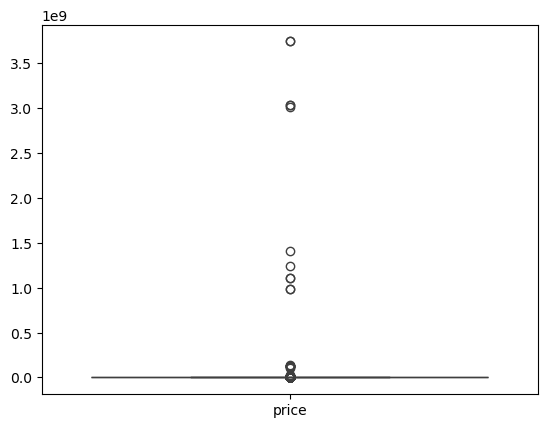

In [10]:
# Box plot 
sns.boxplot(data=df_unique[['price']])
plt.show()

                        region  price    year manufacturer  \
0                     prescott   6000     NaN          NaN   
1                 fayetteville  11900     NaN          NaN   
2                 florida keys  21000     NaN          NaN   
3       worcester / central MA   1500     NaN          NaN   
4                   greensboro   4900     NaN          NaN   
...                        ...    ...     ...          ...   
426875                 wyoming  23590  2019.0       nissan   
426876                 wyoming  30590  2020.0        volvo   
426877                 wyoming  34990  2020.0     cadillac   
426878                 wyoming  28990  2018.0        lexus   
426879                 wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
0                            NaN       NaN          NaN     NaN       NaN   
1                            NaN       NaN          NaN     NaN       NaN   
2                       

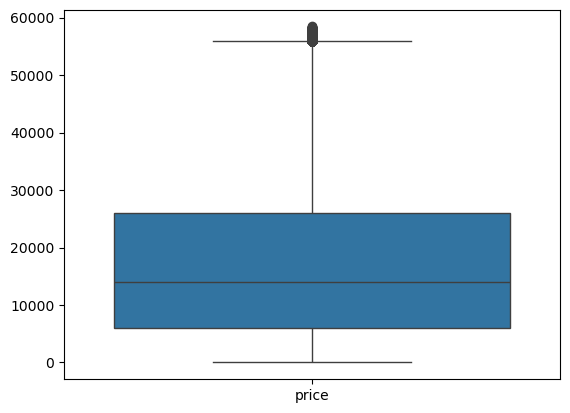

In [11]:
# Calculate IQR for price and filter outliers from the dataframe:
Q1 = df_unique['price'].quantile(0.25) 
Q3 = df_unique['price'].quantile(0.75) 
IQR = Q3 - Q1 
df_unique_no_outliers = df_unique[~((df_unique['price'] < (Q1 - 1.5 * IQR)) |(df_unique['price'] > (Q3 + 1.5 * IQR)))] 
print(df_unique_no_outliers)

# Box plot 
sns.boxplot(data=df_unique_no_outliers[['price']])
plt.show()


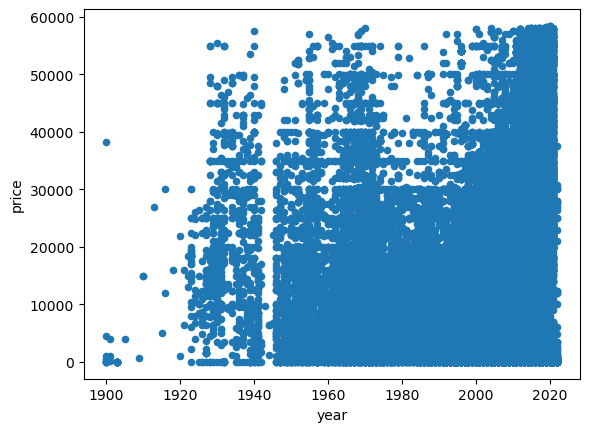

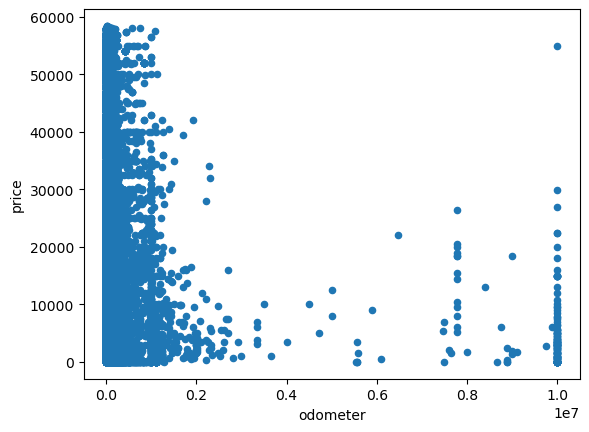

In [12]:
# Scatter plot 
df_unique_no_outliers.plot.scatter(x='year', y='price') 
plt.show()

# Scatter plot 
df_unique_no_outliers.plot.scatter(x='odometer', y='price') 
plt.show()

In [13]:
# missing values analysis on categorical features
df_unique_no_outliers.nunique()

region             404
price            14503
year               113
manufacturer        42
model            28867
condition            6
cylinders            8
fuel                 5
odometer        103823
title_status         6
transmission         3
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [14]:
df_unique_no_outliers['condition'].unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [15]:
df_unique_no_outliers['condition'].isnull().sum()

136825

In [16]:
df_unique_no_outliers['cylinders'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [17]:
df_unique_no_outliers['cylinders'].isnull().sum()

147448

In [18]:
df_unique_no_outliers.query('model == "ecosport"')

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
5746,anchorage / mat-su,16000,2018.0,ford,ecosport,new,other,gas,6100.0,clean,automatic,4wd,NaN,NaN,NaN,ak
17432,fayetteville,19117,2019.0,ford,ecosport,NaN,NaN,gas,43466.0,clean,automatic,4wd,NaN,NaN,black,ar
18843,jonesboro,18995,2018.0,ford,ecosport,NaN,4 cylinders,gas,23561.0,clean,automatic,4wd,NaN,SUV,black,ar
19532,little rock,19117,2019.0,ford,ecosport,NaN,NaN,gas,43466.0,clean,automatic,4wd,NaN,NaN,black,ar
56075,san diego,19950,2019.0,ford,ecosport,NaN,3 cylinders,gas,12858.0,clean,automatic,fwd,NaN,SUV,grey,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414673,morgantown,16788,2018.0,ford,ecosport,excellent,NaN,other,37149.0,clean,automatic,4wd,NaN,NaN,white,wv
416148,eau claire,17450,2019.0,ford,ecosport,NaN,NaN,gas,27207.0,clean,automatic,4wd,NaN,NaN,NaN,wi
420217,madison,21980,2020.0,ford,ecosport,like new,4 cylinders,gas,187.0,clean,automatic,4wd,NaN,NaN,white,wi
423356,milwaukee,14995,2019.0,ford,ecosport,excellent,4 cylinders,gas,52625.0,clean,automatic,4wd,compact,SUV,blue,wi


In [19]:
df_unique_no_outliers['fuel'].unique()

array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [20]:
df_unique_no_outliers['fuel'].isnull().sum()

2399

In [21]:
#Wrong data values - NaN, Wrong Price Values, Inf values
#Data Type Conversion
#Cylinders?
#Drive and Size- has missing values
#Dropping or imputation?

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [23]:
# creating a dataframe only with numerical features
df_numerical_features_only = df_unique_no_outliers[['price', 'year', 'odometer']]

In [24]:
df_numerical_features_only.info()
df_numerical_features_only.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 363642 entries, 0 to 426879
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   price     363642 non-null  int64  
 1   year      362815 non-null  float64
 2   odometer  360272 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 11.1 MB


,price,year,odometer
count,363642.000000,362815.000000,3.602720e+05
mean,16737.741719,2011.014272,9.814526e+04
std,13196.650916,9.720994,2.124932e+05
min,0.000000,1900.000000,0.000000e+00
25%,5990.000000,2008.000000,3.696075e+04
50%,13995.000000,2013.000000,8.500000e+04
75%,25990.000000,2017.000000,1.342635e+05
max,58448.000000,2022.000000,1.000000e+07


In [25]:
# removing records with price = 0
df_numerical_features_only = df_numerical_features_only[df_numerical_features_only['price']> 0]
df_numerical_features_only

,price,year,odometer
0,6000,NaN,NaN
1,11900,NaN,NaN
2,21000,NaN,NaN
3,1500,NaN,NaN
4,4900,NaN,NaN
...,...,...,...
426875,23590,2019.0,32226.0
426876,30590,2020.0,12029.0
426877,34990,2020.0,4174.0
426878,28990,2018.0,30112.0


In [26]:
# removing records with NaN in year and odometer
df_numerical_features_cleaned = df_numerical_features_only.dropna()
df_numerical_features_cleaned

,price,year,odometer
27,33590,2014.0,57923.0
28,22590,2010.0,71229.0
29,39590,2020.0,19160.0
30,30990,2017.0,41124.0
31,15000,2013.0,128000.0
...,...,...,...
426875,23590,2019.0,32226.0
426876,30590,2020.0,12029.0
426877,34990,2020.0,4174.0
426878,28990,2018.0,30112.0


            price      year  odometer
price     1.00000  0.374950 -0.185090
year      0.37495  1.000000 -0.167728
odometer -0.18509 -0.167728  1.000000


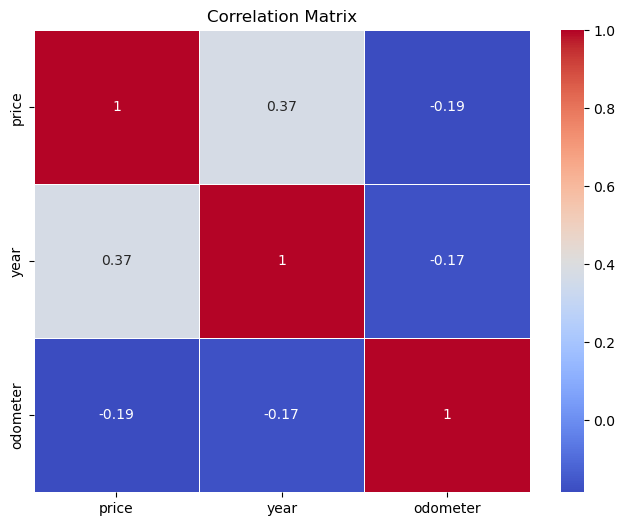

In [27]:
# check correlation in the dataframe
corr_matrix = df_numerical_features_cleaned.corr() 
print(corr_matrix)

#Plot Correlation Matrix:
plt.figure(figsize=(8, 6)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5) 
plt.title('Correlation Matrix') 
plt.show()

In [28]:
# Creating dataframe with all numerical features + categorical features having less than 10 unique values
df_numerical_plus_categorical_features = df_unique_no_outliers[['price', 'year', 'odometer', 'condition', 'cylinders','fuel','title_status', 'transmission', 'drive', 'size']]
df_numerical_plus_categorical_features.head()


,price,year,odometer,condition,cylinders,fuel,title_status,transmission,drive,size
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# analyze the dataframe
df_numerical_plus_categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363642 entries, 0 to 426879
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         363642 non-null  int64  
 1   year          362815 non-null  float64
 2   odometer      360272 non-null  float64
 3   condition     226817 non-null  object 
 4   cylinders     216194 non-null  object 
 5   fuel          361243 non-null  object 
 6   title_status  357093 non-null  object 
 7   transmission  361658 non-null  object 
 8   drive         252793 non-null  object 
 9   size          104493 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 30.5+ MB


In [30]:
# Drop rows where column 'year' or 'odometer' or 'condition' or 'title_status' has NaN values since it does not make sense to impute them
df_numerical_plus_categorical_features_cleaned = df_numerical_plus_categorical_features.dropna(subset=['year', 'odometer', 'condition', 'title_status']) 
print(df_numerical_plus_categorical_features_cleaned)

        price    year  odometer  condition    cylinders    fuel title_status  \
27      33590  2014.0   57923.0       good  8 cylinders     gas        clean   
28      22590  2010.0   71229.0       good  8 cylinders     gas        clean   
29      39590  2020.0   19160.0       good  8 cylinders     gas        clean   
30      30990  2017.0   41124.0       good  8 cylinders     gas        clean   
31      15000  2013.0  128000.0  excellent  6 cylinders     gas        clean   
...       ...     ...       ...        ...          ...     ...          ...   
426875  23590  2019.0   32226.0       good  6 cylinders     gas        clean   
426876  30590  2020.0   12029.0       good          NaN     gas        clean   
426877  34990  2020.0    4174.0       good          NaN  diesel        clean   
426878  28990  2018.0   30112.0       good  6 cylinders     gas        clean   
426879  30590  2019.0   22716.0       good          NaN     gas        clean   

       transmission drive       size  


In [32]:
# convert ordinal data of 'condition' column into numerical data
condition_unique_values = df_numerical_plus_categorical_features_cleaned['condition'].unique()
print(condition_unique_values)

# Define the ordinal categories
condition_categories =['salvage', 'fair', 'good', 'excellent', 'like new', 'new']

# Convert to categorical type with the defined order 
df_numerical_plus_categorical_features_cleaned['condition'] = pd.Categorical(df_numerical_plus_categorical_features_cleaned['condition'], categories=condition_categories, ordered=True)

# Convert the categorical data to numerical codes 
df_numerical_plus_categorical_features_cleaned['condition'] = df_numerical_plus_categorical_features_cleaned['condition'].cat.codes 
print(df_numerical_plus_categorical_features_cleaned.head())


['good' 'excellent' 'fair' 'like new' 'new' 'salvage']
    price    year  odometer  condition    cylinders fuel title_status  \
27  33590  2014.0   57923.0          2  8 cylinders  gas        clean   
28  22590  2010.0   71229.0          2  8 cylinders  gas        clean   
29  39590  2020.0   19160.0          2  8 cylinders  gas        clean   
30  30990  2017.0   41124.0          2  8 cylinders  gas        clean   
31  15000  2013.0  128000.0          3  6 cylinders  gas        clean   

   transmission drive       size  
27        other   NaN        NaN  
28        other   NaN        NaN  
29        other   NaN        NaN  
30        other   NaN        NaN  
31    automatic   rwd  full-size  


/var/folders/q6/bnwh39c10qvc8yc08_l9rgcc0000gn/T/ipykernel_66867/2531836937.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical_plus_categorical_features_cleaned['condition'] = pd.Categorical(df_numerical_plus_categorical_features_cleaned['condition'], categories=condition_categories, ordered=True)
/var/folders/q6/bnwh39c10qvc8yc08_l9rgcc0000gn/T/ipykernel_66867/2531836937.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical_plus_categorical_features_cleaned['condition'] = df_numer

In [33]:
# convert cylinders data to numerical
cylinders_unique_values = df_numerical_plus_categorical_features_cleaned['cylinders'].unique()
print(cylinders_unique_values)

df_numerical_plus_categorical_features_cleaned.loc[df_numerical_plus_categorical_features_cleaned['cylinders'] == '8 cylinders', 'cylinders'] = 8 
df_numerical_plus_categorical_features_cleaned.loc[df_numerical_plus_categorical_features_cleaned['cylinders'] == '6 cylinders', 'cylinders'] = 6 
df_numerical_plus_categorical_features_cleaned.loc[df_numerical_plus_categorical_features_cleaned['cylinders'] == '4 cylinders', 'cylinders'] = 4 
df_numerical_plus_categorical_features_cleaned.loc[df_numerical_plus_categorical_features_cleaned['cylinders'] == '5 cylinders', 'cylinders'] = 5 
df_numerical_plus_categorical_features_cleaned.loc[df_numerical_plus_categorical_features_cleaned['cylinders'] == '3 cylinders', 'cylinders'] = 3 
df_numerical_plus_categorical_features_cleaned.loc[df_numerical_plus_categorical_features_cleaned['cylinders'] == '10 cylinders', 'cylinders'] = 10 
df_numerical_plus_categorical_features_cleaned.loc[df_numerical_plus_categorical_features_cleaned['cylinders'] == '12 cylinders', 'cylinders'] = 12 
df_numerical_plus_categorical_features_cleaned.loc[df_numerical_plus_categorical_features_cleaned['cylinders'] == 'other', 'cylinders'] = np.nan 

print(df_numerical_plus_categorical_features_cleaned)

['8 cylinders' '6 cylinders' nan '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
        price    year  odometer  condition cylinders    fuel title_status  \
27      33590  2014.0   57923.0          2         8     gas        clean   
28      22590  2010.0   71229.0          2         8     gas        clean   
29      39590  2020.0   19160.0          2         8     gas        clean   
30      30990  2017.0   41124.0          2         8     gas        clean   
31      15000  2013.0  128000.0          3         6     gas        clean   
...       ...     ...       ...        ...       ...     ...          ...   
426875  23590  2019.0   32226.0          2         6     gas        clean   
426876  30590  2020.0   12029.0          2       NaN     gas        clean   
426877  34990  2020.0    4174.0          2       NaN  diesel        clean   
426878  28990  2018.0   30112.0          2         6     gas        clean   
426879  30590  2019.0   22716.0       

In [34]:
# drop missing values from cylinders
df_numerical_plus_categorical_features_cleaned = df_numerical_plus_categorical_features_cleaned.dropna(subset=['cylinders']) 
print(df_numerical_plus_categorical_features_cleaned)



        price    year  odometer  condition cylinders fuel title_status  \
27      33590  2014.0   57923.0          2         8  gas        clean   
28      22590  2010.0   71229.0          2         8  gas        clean   
29      39590  2020.0   19160.0          2         8  gas        clean   
30      30990  2017.0   41124.0          2         8  gas        clean   
31      15000  2013.0  128000.0          3         6  gas        clean   
...       ...     ...       ...        ...       ...  ...          ...   
426864  29590  2016.0   53475.0          2         6  gas        clean   
426866  32990  2016.0   55612.0          2         8  gas        clean   
426874  33590  2018.0   30814.0          2         6  gas        clean   
426875  23590  2019.0   32226.0          2         6  gas        clean   
426878  28990  2018.0   30112.0          2         6  gas        clean   

       transmission drive       size  
27            other   NaN        NaN  
28            other   NaN        

In [35]:
# drop all the remaining records having NaN values
df_numerical_plus_categorical_features_cleaned = df_numerical_plus_categorical_features_cleaned.dropna()
df_numerical_plus_categorical_features_cleaned

,price,year,odometer,condition,cylinders,fuel,title_status,transmission,drive,size
31,15000,2013.0,128000.0,3,6,gas,clean,automatic,rwd,full-size
55,19900,2004.0,88000.0,2,8,diesel,clean,automatic,4wd,full-size
59,14000,2012.0,95000.0,3,6,gas,clean,automatic,fwd,full-size
65,22500,2001.0,144700.0,2,8,diesel,clean,manual,rwd,full-size
73,15000,2017.0,90000.0,3,8,gas,rebuilt,automatic,rwd,mid-size
...,...,...,...,...,...,...,...,...,...,...
426809,18000,1990.0,114400.0,2,8,gas,clean,automatic,4wd,full-size
426831,9800,1985.0,115000.0,4,6,gas,clean,automatic,rwd,sub-compact
426833,6800,1997.0,69550.0,2,8,gas,clean,automatic,rwd,compact
426836,0,2018.0,20492.0,3,6,diesel,clean,automatic,4wd,full-size


In [36]:
# drop all records having Price=0
df_numerical_plus_categorical_features_cleaned = df_numerical_plus_categorical_features_cleaned[df_numerical_plus_categorical_features_cleaned['price']> 0]
df_numerical_plus_categorical_features_cleaned

,price,year,odometer,condition,cylinders,fuel,title_status,transmission,drive,size
31,15000,2013.0,128000.0,3,6,gas,clean,automatic,rwd,full-size
55,19900,2004.0,88000.0,2,8,diesel,clean,automatic,4wd,full-size
59,14000,2012.0,95000.0,3,6,gas,clean,automatic,fwd,full-size
65,22500,2001.0,144700.0,2,8,diesel,clean,manual,rwd,full-size
73,15000,2017.0,90000.0,3,8,gas,rebuilt,automatic,rwd,mid-size
...,...,...,...,...,...,...,...,...,...,...
426808,18000,2005.0,130000.0,3,8,gas,lien,automatic,4wd,full-size
426809,18000,1990.0,114400.0,2,8,gas,clean,automatic,4wd,full-size
426831,9800,1985.0,115000.0,4,6,gas,clean,automatic,rwd,sub-compact
426833,6800,1997.0,69550.0,2,8,gas,clean,automatic,rwd,compact


In [37]:
# One-hot encode the categorical columns 
#df_numerical_plus_categorical_features_cleaned_encoded = pd.get_dummies(df_numerical_plus_categorical_features_cleaned, columns=['fuel', 'title_status', 'transmission', 'drive', 'size'], drop_first=True, dtype=int)
df_numerical_plus_categorical_features_cleaned_encoded = pd.get_dummies(df_numerical_plus_categorical_features_cleaned, columns=['fuel', 'title_status', 'transmission', 'drive', 'size'], dtype=int)
df_numerical_plus_categorical_features_cleaned_encoded.head()


,price,year,odometer,condition,cylinders,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,...,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,size_compact,size_full-size,size_mid-size,size_sub-compact
31,15000,2013.0,128000.0,3,6,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
55,19900,2004.0,88000.0,2,8,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
59,14000,2012.0,95000.0,3,6,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
65,22500,2001.0,144700.0,2,8,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
73,15000,2017.0,90000.0,3,8,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [42]:
#Simple linear regression model using scikit-learn library and only numerical features

#Prepare Data: Split the data into features (X) and target (y):
X = df_numerical_features_cleaned[['year', 'odometer']] 
y = df_numerical_features_cleaned['price']

#Split the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the Model: Initialize and train the linear regression model:
model = LinearRegression() 
model.fit(X_train, y_train)

#print coeficients of the linera regression model
coefs = model.coef_
print(coefs)

#Make Predictions: Use the trained model to make predictions on the test set:
y_pred = model.predict(X_test)

[ 4.54387901e+02 -7.38001027e-03]


In [43]:
# Linear regression model using numerical and non-numerical features

# Define the features (X) and target variable (y) 
X = df_numerical_plus_categorical_features_cleaned_encoded.drop('price', axis=1) 
y = df_numerical_plus_categorical_features_cleaned_encoded['price']

# Split the data into training and testing sets 
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model 
model2 = LinearRegression() 
# Train the model on the training data 
model2.fit(X_train_2, y_train_2)

# Make predictions on the test data 
y_pred_2 = model2.predict(X_test_2) 

#print coeficients of the linera regression model
coefs = model2.coef_
print(coefs)

print(X_test_2.head(5))
print(y_test_2.head(5))
print(pd.DataFrame(y_pred_2).head())

[ 2.29235694e+02 -5.16951287e-03  3.57729912e+03  1.20531617e+03
  7.56771780e+03  2.04851929e+03 -3.01918021e+03 -1.70604922e+03
 -4.89100766e+03 -5.17847534e+02  3.25966303e+03  9.87424957e+02
 -2.08970970e+03  1.95085599e+02 -1.83461635e+03  1.22650887e+03
  3.42205378e+03 -4.64856265e+03  1.63606644e+03 -3.46940050e+03
  1.83333406e+03 -5.42251432e+02  8.59700643e+02 -1.25653725e+02
 -1.91795486e+02]
          year  odometer  condition cylinders  fuel_diesel  fuel_electric  \
261086  2008.0  196000.0          2         4            0              0   
266096  2014.0  114839.0          2         8            0              0   
359000  2003.0  151542.0          2         6            0              0   
68568   2004.0  192726.0          2         6            0              0   
354728  2013.0   81760.0          4         4            0              0   

        fuel_gas  fuel_hybrid  fuel_other  title_status_clean  ...  \
261086         1            0           0                  

In [44]:
# Scaled Ridge Regression Model using numerical and non-numerical features

# Define the features (X) and target variable (y) 
X = df_numerical_plus_categorical_features_cleaned_encoded.drop('price', axis=1) 
y = df_numerical_plus_categorical_features_cleaned_encoded['price']

# Split the data into training and testing sets 
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model that will standardize the data before fitting it
scaled_ridge_model = Pipeline([
    ('scale', StandardScaler()),
    ('ridge_regression', Ridge(alpha=100)) # I started with alpha=1 and incremented in steps of 10 till 100
])
scaled_ridge_model.fit(X_train_3, y_train_3)

# Make predictions on the test data 
y_pred_3 = scaled_ridge_model.predict(X_test_3) 

#print coeficients of the linera regression model
coefs = scaled_ridge_model.named_steps['ridge_regression'].coef_
print(coefs)

print(X_test_3.head(5))
print(y_test_3.head(5))
print(pd.DataFrame(y_pred_3).head())

[ 2585.28590357 -1134.19829121  2781.54039673  1995.31965025
  1561.83349467    11.9073638  -1271.02798469  -354.73833812
  -229.92743614   -87.84277545   333.84351031    67.56080855
   -46.01594175    65.16943883  -208.42675583  -207.36831826
   416.92724192  -608.78290325   848.52364171 -1613.13611105
   827.05769659  -254.23632708   326.15753573  -151.42709333
   -52.87104736]
          year  odometer  condition cylinders  fuel_diesel  fuel_electric  \
261086  2008.0  196000.0          2         4            0              0   
266096  2014.0  114839.0          2         8            0              0   
359000  2003.0  151542.0          2         6            0              0   
68568   2004.0  192726.0          2         6            0              0   
354728  2013.0   81760.0          4         4            0              0   

        fuel_gas  fuel_hybrid  fuel_other  title_status_clean  ...  \
261086         1            0           0                   1  ...   
266096        

In [45]:
# Scaled LASSO regression Model using numerical and non-numerical features

# Define the features (X) and target variable (y) 
X = df_numerical_plus_categorical_features_cleaned_encoded.drop('price', axis=1) 
y = df_numerical_plus_categorical_features_cleaned_encoded['price']

# Split the data into training and testing sets 
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model that will standardize the data before fitting it
scaled_lasso_model = Pipeline([
    ('scale', StandardScaler()),
    ('lasso_regression', Lasso(alpha=18))
])
scaled_lasso_model.fit(X_train_4, y_train_4)

# Make predictions on the test data 
y_pred_4 = scaled_lasso_model.predict(X_test_4) 

#print coeficients of the linera regression model
coefs = scaled_lasso_model.named_steps['lasso_regression'].coef_
print(coefs)

print(X_test_4.head(5))
print(y_test_4.head(5))
print(pd.DataFrame(y_pred_4).head())

[ 2558.05624191 -1119.71490608  2773.389694    1983.60391992
  2407.1854702     67.24195681  -343.5131832      0.
   -92.5845        -0.           353.06959472    67.31329814
   -20.66800491   113.2195795   -147.78267747    -0.
   587.18629282  -527.81965823     0.         -2441.29353307
    63.77648051  -126.32248131   485.83515838    -0.
    -0.        ]
          year  odometer  condition cylinders  fuel_diesel  fuel_electric  \
261086  2008.0  196000.0          2         4            0              0   
266096  2014.0  114839.0          2         8            0              0   
359000  2003.0  151542.0          2         6            0              0   
68568   2004.0  192726.0          2         6            0              0   
354728  2013.0   81760.0          4         4            0              0   

        fuel_gas  fuel_hybrid  fuel_other  title_status_clean  ...  \
261086         1            0           0                   1  ...   
266096         1            0         

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Mean Squared Error: 136761098.99484786
R² Score: 0.16427815364517517


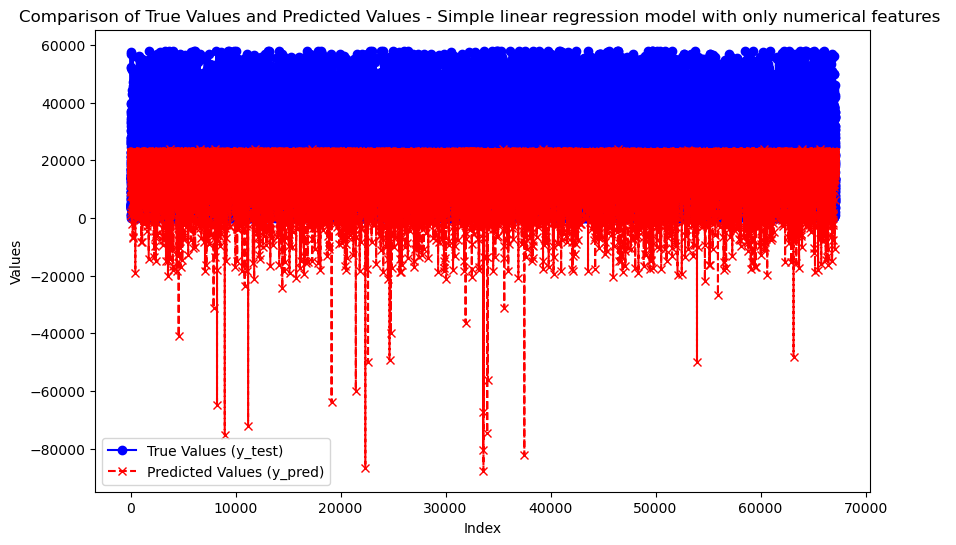

In [49]:
#Evaluation of the First Simple linear regression model with only numerical features: 
#Evaluate the model's performance using Mean Squared Error (MSE) and R-squared (R²):
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
print(f'Mean Squared Error: {mse}') 
print(f'R² Score: {r2}')

# Plot y_test and y_pred 
plt.figure(figsize=(10, 6)) 
plt.plot(y_test.values, label='True Values (y_test)', color='blue', marker='o') 
plt.plot(y_pred, label='Predicted Values (y_pred)', color='red', linestyle='--', marker='x') 
# Add titles and labels 
plt.title('Comparison of True Values and Predicted Values - Simple linear regression model with only numerical features ') 
plt.xlabel('Index') 
plt.ylabel('Values') 
plt.legend() 
# Show the plot 
plt.show()


Mean Squared Error: 75071781.20284384
R-squared: 0.3664613336903795


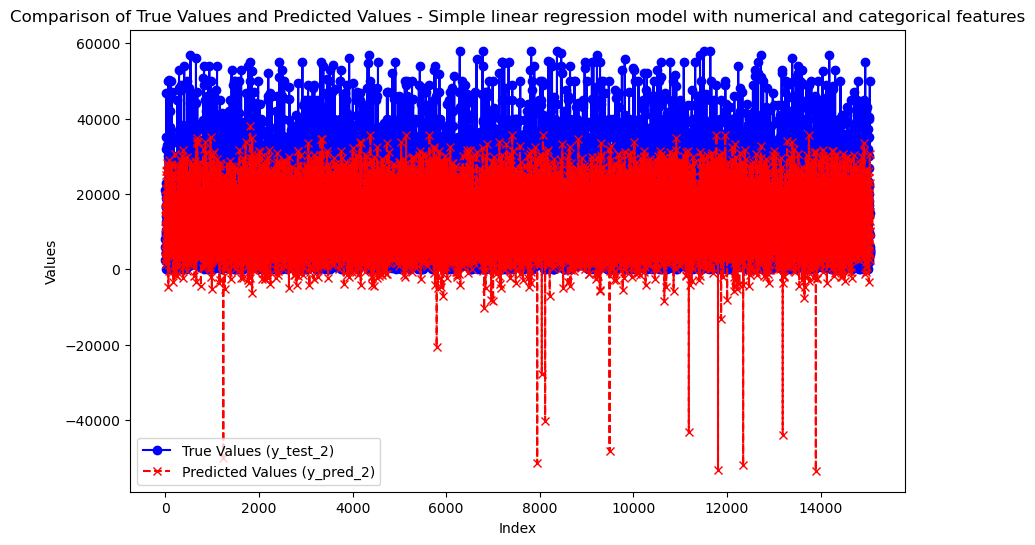

In [50]:
#Evaluation of the Second Simple linear regression model with numerical and non-numerical features: 
mse = mean_squared_error(y_test_2, y_pred_2) 
r2 = r2_score(y_test_2, y_pred_2) 
print(f'Mean Squared Error: {mse}') 
print(f'R-squared: {r2}')

# Plot y_test_2 and y_pred_2 
plt.figure(figsize=(10, 6)) 
plt.plot(y_test_2.values, label='True Values (y_test_2)', color='blue', marker='o') 
plt.plot(y_pred_2, label='Predicted Values (y_pred_2)', color='red', linestyle='--', marker='x') 
# Add titles and labels 
plt.title('Comparison of True Values and Predicted Values - Simple linear regression model with numerical and categorical features') 
plt.xlabel('Index') 
plt.ylabel('Values') 
plt.legend() 
# Show the plot 
plt.show()

Mean Squared Error: 75069454.98017082
R-squared: 0.3664809649284585


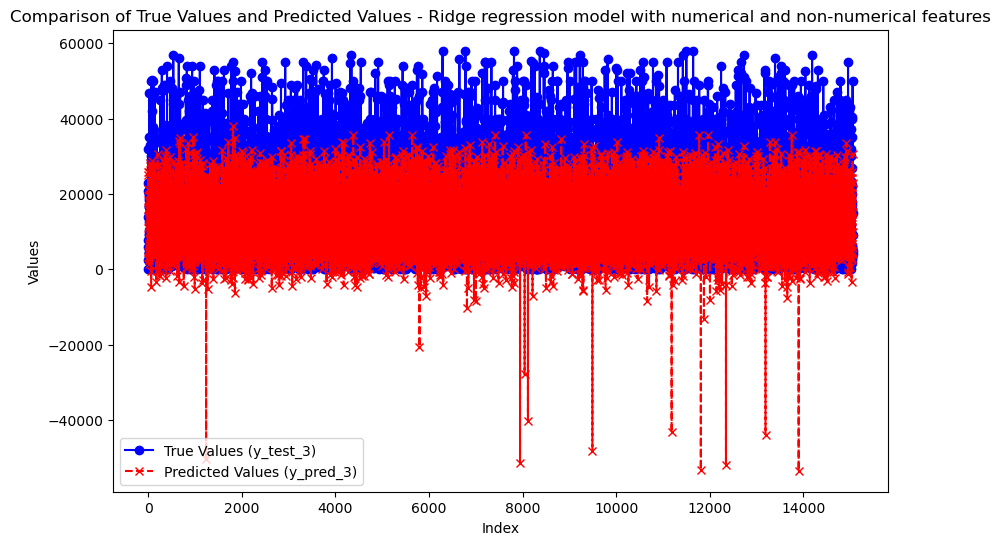

In [51]:
#Evaluation of the Ridge regression model with numerical and non-numerical features: 
mse = mean_squared_error(y_test_3, y_pred_3) 
r2 = r2_score(y_test_3, y_pred_3) 
print(f'Mean Squared Error: {mse}') 
print(f'R-squared: {r2}')

# Plot y_test_3 and y_pred_3 
plt.figure(figsize=(10, 6)) 
plt.plot(y_test_3.values, label='True Values (y_test_3)', color='blue', marker='o') 
plt.plot(y_pred_3, label='Predicted Values (y_pred_3)', color='red', linestyle='--', marker='x') 
# Add titles and labels 
plt.title('Comparison of True Values and Predicted Values - Ridge regression model with numerical and non-numerical features') 
plt.xlabel('Index') 
plt.ylabel('Values') 
plt.legend() 
# Show the plot 
plt.show()

Mean Squared Error: 75065481.14031802
R-squared: 0.36651450058140467


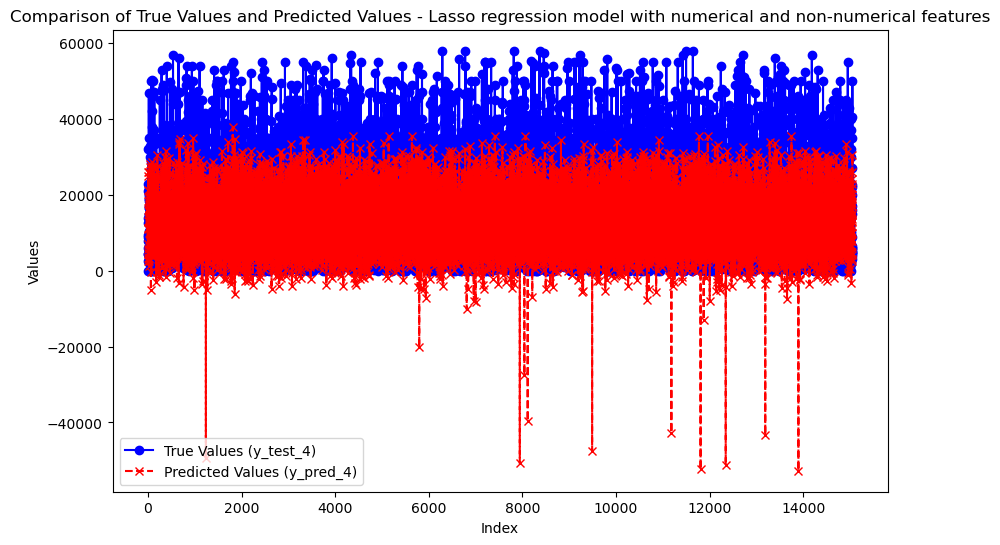

In [52]:
#Evaluation of the Lasso regression model with numerical and non-numerical features: 
mse = mean_squared_error(y_test_4, y_pred_4) 
r2 = r2_score(y_test_4, y_pred_4) 
print(f'Mean Squared Error: {mse}') 
print(f'R-squared: {r2}')

# Plot y_test_4 and y_pred_4 
plt.figure(figsize=(10, 6)) 
plt.plot(y_test_4.values, label='True Values (y_test_4)', color='blue', marker='o') 
plt.plot(y_pred_4, label='Predicted Values (y_pred_4)', color='red', linestyle='--', marker='x') 
# Add titles and labels 
plt.title('Comparison of True Values and Predicted Values - Lasso regression model with numerical and non-numerical features') 
plt.xlabel('Index') 
plt.ylabel('Values') 
plt.legend() 
# Show the plot 
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.